<a href="https://colab.research.google.com/github/DAG00DAG33/BW2Color/blob/main/BW2Color_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import h5py
%matplotlib inline    
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
import time



In [ ]:
from keras.applications.vgg19 import VGG19

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Reshape, Concatenate
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, UpSampling2D
from keras.models import Model
from keras.models import model_from_json
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *
from keras import optimizers
# from keras import models

import keras.backend as K
K.set_image_data_format('channels_last')

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
from herr import *

In [ ]:
# plt.rcParams['figure.figsize'] = [10, 5]

# Import Data

In [ ]:
# 'Stuff/Dedos/datasets/train_signs.h5', 'Stuff/Dedos/datasets/test_signs.h5'
# 'fotos/dedosDataset2.h5', 'fotos/dedosDataset2.h5'
# 'fotos/suma.h5', 'fotos/suma.h5'
# 'fotos/miniData.h5', 'fotos/miniData.h5'
# X_train, Y_train, X_test, Y_test = load_dataset('fotos/suma2.h5', 'fotos/suma2.h5')

In [ ]:
X_train.shape

(15, 224, 224, 1)

# Model

In [ ]:
def model(X_shape, W_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(X_shape)
    W_input = Input(W_shape)

    X = BatchNormalization()(X_input)
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv0', padding='same', activation='relu')(X) 
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv00', padding='same', activation='relu')(X)


    
#     X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv000', padding='same', activation='relu')(X_input) 
#     X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv0000', padding='same', activation='relu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool0')(X)
    
    
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv1', padding='same', activation='relu')(X) 
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv11', padding='same', activation='relu')(X)


    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    
    
    
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv2', padding='same', activation='relu')(X) 
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv22', padding='same', activation='relu')(X)

    
#     X = MaxPooling2D((2, 2), name='max_pool2')(X)  
    #########################

      
    W = BatchNormalization()(W_input)
    X = BatchNormalization()(X)
    X = Concatenate()([X, W])
# X = Flatten()(X)
#     X = Dense(10000, activation='sigmoid', name='fc1')(X)
#     X = Dense(90*160*64, activation='sigmoid', name='fc2')(X)
#     X = Reshape((90,160,64))(X)

    #########################
#     X = UpSampling2D((2, 2))(X)
    
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv2_', padding='same', activation='relu')(X) 
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv22_', padding='same', activation='relu')(X)

    
    
    X = UpSampling2D((2, 2))(X)
    
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv1_', padding='same', activation='relu')(X) 
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv11_', padding='same', activation='relu')(X)

    
    
    X = UpSampling2D((2, 2))(X)
    
#     X2 = BatchNormalization()(X_input)
#     X = Concatenate()([X, X2])
    
#     X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv0_', padding='same', activation='relu')(X) 
#     X = Conv2D(8, (3, 3), strides = (1, 1), name = 'conv00_', padding='same', activation='relu')(X)
    
    X = Conv2D(8, (3, 3), strides = (1, 1), name = 'conv000_', padding='same', activation='relu')(X) 
    X = Conv2D(2, (3, 3), strides = (1, 1), name = 'conv0000_', padding='same', activation='tanh')(X)


    




    

    


    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = [X_input, W_input] , outputs = X, name='bw2color')

    return model

In [ ]:
finger_model = model(X_train.shape[1:], W_train[0].shape) 

In [ ]:
finger_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
print(finger_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 224, 224, 1)  4           input_8[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 224, 224, 16) 160         batch_normalization_7[0][0]      
__________________________________________________________________________________________________
conv00 (Conv2D)                 (None, 224, 224, 16) 2320        conv0[0][0]                      
__________________________________________________________________________________________________
max_pool0 

# Fit

In [ ]:
history = finger_model.fit([X_train, W_train], Y_train, epochs=10, batch_size=5)#validation_data=([X_test, W_test], Y_test)

Epoch 1/10
15/15 [==============================] - 5s 326ms/step - loss: 0.0041
Epoch 2/10
15/15 [==============================] - 6s 393ms/step - loss: 0.0040
Epoch 3/10
15/15 [==============================] - 5s 357ms/step - loss: 0.0041
Epoch 4/10
15/15 [==============================] - 5s 320ms/step - loss: 0.0037
Epoch 5/10
15/15 [==============================] - 5s 319ms/step - loss: 0.0039
Epoch 6/10
15/15 [==============================] - 5s 322ms/step - loss: 0.0043
Epoch 7/10
15/15 [==============================] - 5s 319ms/step - loss: 0.0037
Epoch 8/10
15/15 [==============================] - 5s 350ms/step - loss: 0.0032
Epoch 9/10
15/15 [==============================] - 5s 358ms/step - loss: 0.0038
Epoch 10/10
15/15 [==============================] - 5s 333ms/step - loss: 0.0032


Text(0.5, 0, 'epoch')

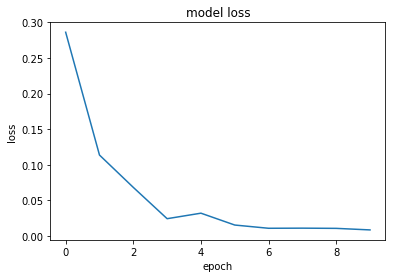

In [ ]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# Evaluate


In [ ]:
accuracy(finger_model,X_test, Y_test)

# Use

In [ ]:
def use(X, W, Y, Q, i):
    
    # Original photo
    y_str = np.append(X[i]*255, Y[i]*255, axis=2)
    y_col = cv2.cvtColor(np.uint8(y_str), cv2.COLOR_Lab2RGB)
    plt.subplot(221)
    plt.imshow(y_col)
    
    # Pred photo
    y_pred_2 = finger_model.predict([X[i].reshape(-1,224,224,1), W[i].reshape(1,56,56,-1)]).reshape(224,224,-1)
    y_pred = np.append(X[i]*255, y_pred_2*255, axis=2)
    y_pred_col = cv2.cvtColor(np.uint8(y_pred), cv2.COLOR_Lab2RGB)
    plt.subplot(222)
    plt.imshow(y_pred_col)
    
    # Pred Chanels
    plt.subplot(223)
    plt.imshow(y_pred[:,:,1], cmap="gray")
    plt.subplot(224)
    plt.imshow(y_pred[:,:,2], cmap="gray")
    
    #High res photo
    Q_bw = cv2.cvtColor(np.uint8(Q[i]), cv2.COLOR_BGR2GRAY).reshape(720,720,-1)
    y_pred_0 = cv2.resize(y_pred_2[:,:,0]*255  , (720 , 720)).reshape(720,720,-1)
    y_pred_1 = cv2.resize(y_pred_2[:,:,1]*255  , (720 , 720)).reshape(720,720,-1)
    y_app = np.append(Q_bw, y_pred_0, axis=2)
    y_str_q = np.append(y_app, y_pred_1, axis=2)
    y_col_q = cv2.cvtColor(np.uint8(y_str_q), cv2.COLOR_Lab2RGB)
    
    return y_pred, y_pred_col, y_col_q


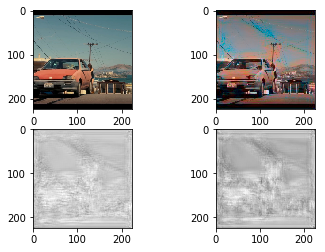

In [ ]:
n = 13
y_pred, y_pred_col, y_pred_q = use(X_test, W_test, Y_test, Q_test, n)

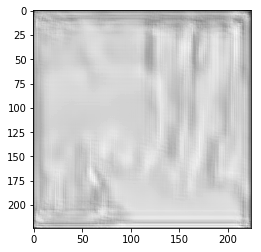

In [ ]:
plt.imshow(y_pred[:,:,2].astype(int),cmap="gray")

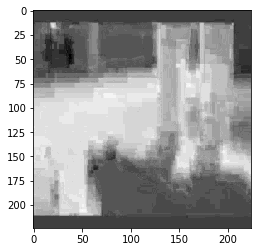

In [ ]:
plt.imshow(Y_test[n][:,:,1], cmap="gray")

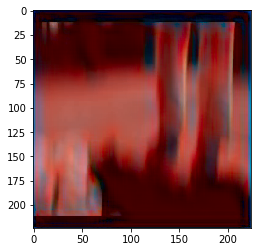

In [ ]:
plt.imshow(y_pred_col)

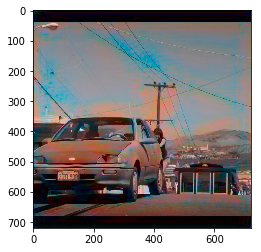

In [ ]:
plt.imshow(y_pred_q)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
np.sum(abs(y_pred[:,:,2]))/(224*224)

133.30816953507613

In [ ]:
np.sum(abs(X_train[n][:,:,0]))/(224*224)

0.29345183385854345

In [ ]:
y_pred[:,:,2]

array([[ 222.70959473,  188.49290466,  227.27613831, ...,  222.9670105 ,
         231.22869873,  125.63630676],
       [ 115.9280777 ,   90.19678497,  148.3997345 , ...,  109.42267609,
          59.63768005,   79.32244873],
       [ 115.9280777 ,  131.31187439,  131.31187439, ...,  131.31187439,
          37.75641251,  123.44940186],
       ...,
       [ 115.9280777 ,  131.31187439,  131.31187439, ...,  131.31187439,
          90.19678497,  -69.67215729],
       [ 139.07270813,  202.80078125,  131.31187439, ...,  173.59114075,
          94.29805756,  -35.44807434],
       [  63.08200455,   21.17759705,  -74.98630524, ...,  -97.38549805,
        -119.51746368, -163.89651489]])

In [ ]:
Y_train[0][:,:,1]*255

array([[32130., 32130., 32130., ..., 32130., 32130., 32130.],
       [32130., 32130., 32130., ..., 32130., 32130., 32130.],
       [32130., 32130., 32130., ..., 32130., 32130., 32130.],
       ...,
       [34425., 35955., 35700., ..., 28815., 29070., 28815.],
       [34680., 36210., 35955., ..., 28815., 29070., 29580.],
       [34935., 35955., 36465., ..., 29580., 29070., 29835.]])

# Save the model

In [ ]:
# Guardar modelo en JSON
model_json = finger_model.to_json()
with open("model/03JGB.json", "w") as json_file:
    json_file.write(model_json)
# Guardar Weights
finger_model.save_weights("model/03JGB.h5")
print("Saved model to disk")

Saved model to disk


# Load the model

In [ ]:
# Cargar modelo
json_file = open('model/03JGB.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
finger_model = model_from_json(loaded_model_json)
# Cargar Weights
finger_model.load_weights("model/03JGB.h5")
print("Loaded model from disk")

Loaded model from disk


# Make database
It is a bit of a mess, but it worked to generate a basic database

### padding

In [ ]:
fotos2 = []
for i in range(fotos.shape[0]):
    BLUE = [255,255,255]
    img1 = fotos[i]#cv2.imread('/image.png')
    height, width, sdf = img1.shape
#     print(height, width)
    if height>width:
        h=0
        w=int((height-width)/2)
    elif width>height:
        w=0
        h=int((width-height)/2)
    else:
        w=0
        h=0
    fotos2.append(cv2.copyMakeBorder(img1,h,h,w,w,cv2.BORDER_CONSTANT,value=BLUE))
#     plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
#     plt.subplot(233),plt.imshow(constant,'gray'),plt.title('CONSTANT')
#     plt.show()
#     print(constant.shape)
    if i%10 == 0:
        print(i)
fotos2=np.asarray(fotos2)

NameError: name 'fotos' is not defined

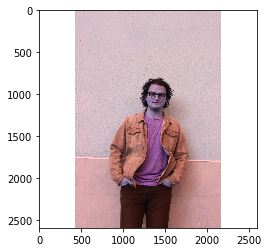

In [ ]:
plt.imshow(fotos2[7])

### Split video into frames

In [ ]:
import cv2
 
# Opens the Video file
cap= cv2.VideoCapture('frames/video3.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    if i%64 == 0:
        cv2.imwrite('frames/frames/frame'+str(i)+'.png',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

### Load frames

In [ ]:
import glob
fotos = [cv2.imread(file) for file in glob.glob("frames/frames/*.png")]

In [ ]:
fotos = np.asarray(fotos)

In [ ]:
fotos.shape

(64, 720, 1280, 3)

In [ ]:
#_____________________Only for non Square data________________________________
X = []
Y = []
Z = []
X2 = []
for i in range(fotos.shape[0]):
    y, x, h, w = 0, 280, 720, 720
    crop_img = fotos[i]#[y:y+h, x:x+w]
    resize_img = cv2.resize(crop_img  ,None,fx=0.5,fy=0.5)
    XnoDim = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY)
    X.append(np.expand_dims(XnoDim, axis=2))
    Y.append(cv2.cvtColor(resize_img, cv2.COLOR_BGR2Lab)[:,:,1:])
    Z.append(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))
    X2.append(np.repeat(X[i], 3, -1))
X = np.asarray(X)
Y = np.asarray(Y)
Z = np.asarray(Z)
# X2 = np.asarray(X2)
# X = np.expand_dims(X, axis=0)

In [ ]:
X = np.empty([fotos.shape[0],224,224,1])
Y = np.empty([fotos.shape[0],224,224,2])
Z = np.empty([fotos.shape[0],224,224,3])
Q = np.empty([fotos.shape[0],720,720,3])
for i in range(fotos.shape[0]):
    y, x, h, w = 0, 280, 720, 720
    crop_img = fotos[i][y:y+h, x:x+w]
    resize_img = cv2.resize(crop_img  , (224 , 224))
    X[i] = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY).reshape(224,224,1)
    Y[i] = cv2.cvtColor(resize_img, cv2.COLOR_BGR2Lab)[:,:,1:]
    Z[i] = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
    Q[i] = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)

In [ ]:
X = X/255
Y = Y/255

In [ ]:
X.shape

(64, 224, 224, 1)

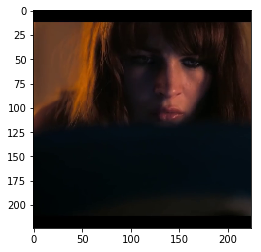

In [ ]:
plt.imshow(Z[0].astype(int))

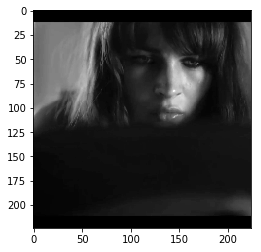

In [ ]:
plt.imshow(X[0].reshape(224, 224), cmap='gray')

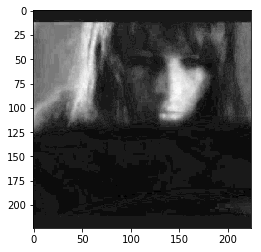

In [ ]:
plt.imshow(Y[0][:,:,0], cmap='gray')

### Spit data

In [ ]:
def split_tran_test(X, Y, a, b, test_ratio):
    shuffled_indices = np.random.permutation(X.shape[0])
    test_set_size = int(X.shape[0] * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices], X[test_indices], Y[train_indices], Y[test_indices], a[train_indices], a[test_indices], b[train_indices], b[test_indices]

In [ ]:
W_train, W_test, Y_train, Y_test, X_train, X_test, Q_train, Q_test = split_tran_test(W, Y, X, Q, 0.78)

In [ ]:
W_train.shape

(15, 56, 56, 64)

In [ ]:
Q_train.shape

(15, 720, 720, 3)

### Generate W

In [ ]:
base_model = VGG19(weights='imagenet')
imageMol = Model(inputs=base_model.input, outputs=base_model.get_layer('block3_conv4').output)#'block3_conv4''block2_conv1'

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
Inception_model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None ,input_shape=(224,224,3), pooling=None, classes=1000)

In [ ]:
# print(Inception_model.summary())

In [ ]:
print(X.shape)  # (64, 224, 224)
X2 = np.repeat(X[...], 3, -1)
print(X2.shape)  # (64, 224, 224, 3)

(64, 224, 224, 1)
(64, 224, 224, 3)


In [ ]:
X2[2].shape

(224, 224, 3)

In [ ]:
imageMol_pred = imageMol.predict(X2)

In [ ]:
W =  imageMol_pred[:,:,:,:64]

In [ ]:
W.shape

(64, 56, 56, 64)

In [ ]:
a = base_model.predict(Z[0].reshape(-1,224,224,3))

In [ ]:
np.argmax(a)

782

In [ ]:
a[:,207]

array([0.00021987], dtype=float32)

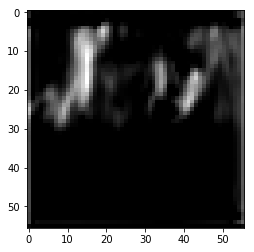

In [ ]:
plt.imshow(W[0][:,:,12], cmap="gray")

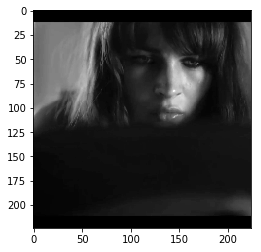

In [ ]:
plt.imshow(X[0].reshape(224,224),cmap="gray")

### Extra

In [ ]:
Xb_test = X_test
Xb_train = X_train
Yb_test = Y_test
Yb_train = Y_train
Wb_test = W_test
Wb_train = W_train
print(Xb_test.shape)
print(Xb_train.shape)
print(Yb_test.shape)
print(Yb_train.shape)
print(Wb_test.shape)
print(Wb_train.shape)


(79, 224, 224, 1)
(80, 224, 224, 1)
(79, 224, 224, 2)
(80, 224, 224, 2)
(79, 56, 56, 64)
(80, 56, 56, 64)
